# Notebook to make Fig. 1

In [37]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import pylab
import pandas as pd

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style

from helper_functions import *

style.use('plotting.mplstyle')

### Load data

In [36]:
f_root = '/home/simona.miller/Xeff_injection_campaign/data/' ## TODO: update to have results from this folder?
pop1 = pd.read_json(f_root+'underlying_population1.json')
pop2 = pd.read_json(f_root+'underlying_population2.json')
pop3 = pd.read_json(f_root+'underlying_population3.json')

### Plot spin parameters for each population

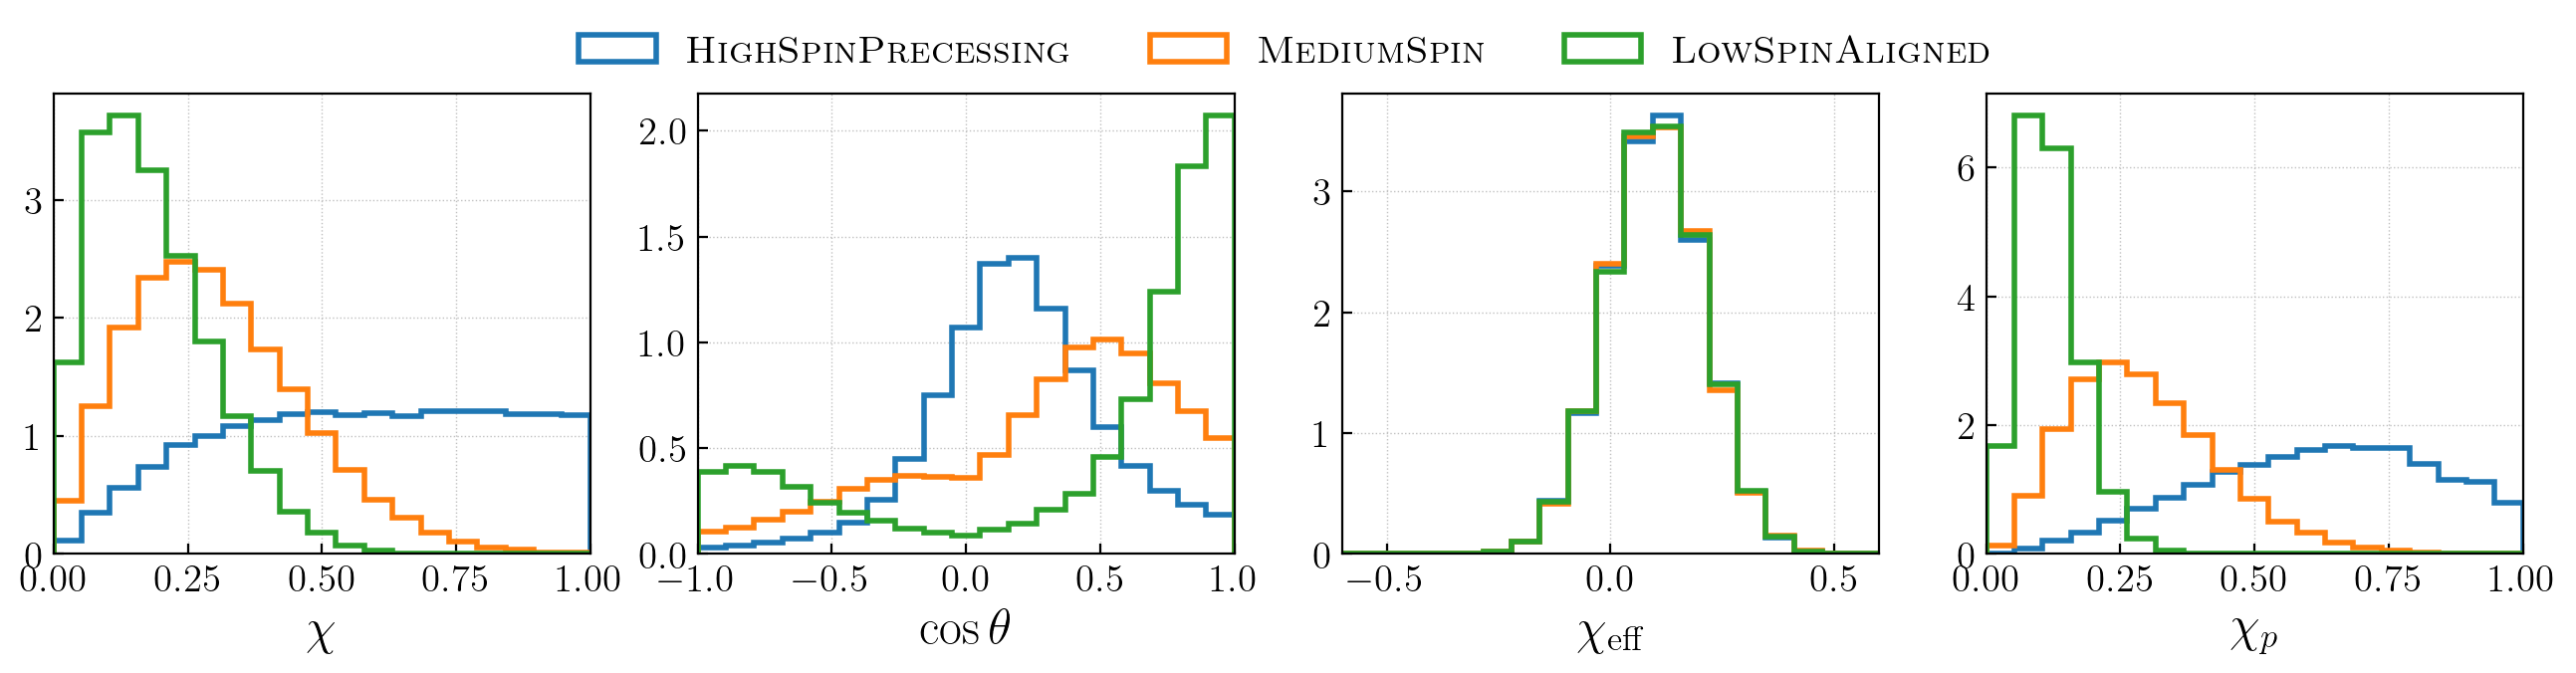

In [35]:
labels = [r'$\mathrm{\textsc{HighSpinPrecessing}}$', r'$\mathrm{\textsc{MediumSpin}}$', r'$\mathrm{\textsc{LowSpinAligned}}$']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for i,pop in enumerate([pop1, pop2, pop3]):
    
    # spin magnitude
    chi1 = np.sqrt(pop.s1x**2 + pop.s1y**2 + pop.s1z**2)
    chi2 = np.sqrt(pop.s2x**2 + pop.s2y**2 + pop.s2z**2)
    chi = np.concatenate((chi1,chi2))
    axes[0].hist(chi, density=True, bins=np.linspace(0, 1, 20), histtype='step', lw=2, label=labels[i])
    axes[0].set_xlim(0,1)
    
    # tilt angle
    cost1 = pop.s1z/chi1
    cost2 = pop.s2z/chi2
    cost = np.concatenate((cost1,cost2))
    axes[1].hist(cost, density=True, bins=np.linspace(-1, 1, 20), histtype='step', lw=2)
    axes[1].set_xlim(-1,1)
    
    # chi effective
    q = pop.m2/pop.m1
    chieff = calculate_chiEff(chi1, chi2, cost1, cost2, q)
    axes[2].hist(chieff, density=True, bins=np.linspace(-0.6, 0.6, 20), histtype='step', lw=2)
    axes[2].set_xlim(-0.6,0.6)
    
    # chi p
    sint1 = np.sin(np.arccos(cost1))
    sint2 = np.sin(np.arccos(cost2))
    chip = calculate_ChiP(chi1, chi2, sint1, sint2, q)
    axes[3].hist(chip, density=True, bins=np.linspace(0, 1, 20), histtype='step', lw=2)
    axes[3].set_xlim(0, 1)
    
axes[0].legend(bbox_to_anchor=(0.95, 1.02, 1., .102), loc='lower left',
                      ncol=3,  borderaxespad=0.)
    
axes[0].set_xlabel(r'$\chi$')
axes[1].set_xlabel(r'$\cos\theta$')
axes[2].set_xlabel(r'$\chi_\mathrm{eff}$')
axes[3].set_xlabel(r'$\chi_p$')  

for ax in axes: 
    ax.grid(ls=':', color='silver', lw=0.5)
    
plt.savefig('figure_01.pdf',bbox_inches='tight')
plt.show()